# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker # to alter scientific notation on a chart, tick marks

## 1️) Load and Inspect the Dataset

In [2]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Double check some datatypes, and for nulls and duplicates:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [12]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [13]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [14]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [19]:
conn = sqlite3.connect('../data/superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region', 'Postal Code']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Region':'region',
    'Postal Code':'postal_code'
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id',
    'Sales':'sales',
    'Quantity':'quantity',
    'Discount':'discount',
    'Profit':'profit'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer categories bring in the most revenue and profit?

In [17]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,8380282.43,973085.86
1,Corporate,5044899.83,660287.69
2,Home Office,2964459.36,434344.01


### What are the top 10 customers by total sales?

In [63]:
query2 = """ 
SELECT 
    c.customer_id, 
    SUM(od.sales) AS total_sales
FROM customers c
INNER JOIN orders o ON c.customer_id = o.customer_id
INNER JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.customer_id
ORDER BY total_sales DESC
LIMIT 10;
"""
result2 = pd.read_sql(query2, conn)
result2

,customer_id,total_sales
0,KL-16645,155927.519
1,SE-20110,134303.818
2,CL-12565,130566.552
3,AB-10105,130262.139
4,SC-20095,127281.006
5,SM-20320,125215.250
6,EH-13765,123730.560
7,GT-14710,118201.200
8,SV-20365,114709.500
9,JL-15835,107799.153


### Which product categories and subcategories are the most profitable overall?

In [ ]:
query3 = """ 
SELECT 
    p.category, 
    p.subcategory, 
    SUM(od.profit) AS total_profit
FROM products p
INNER JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.category, p.subcategory
ORDER BY total_profit DESC;
"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,total_profit
0,Technology,Copiers,55617.8249
1,Technology,Accessories,48359.0527
2,Technology,Phones,46936.1861
3,Office Supplies,Paper,36994.5335
4,Office Supplies,Binders,30373.2020
5,Furniture,Chairs,26707.6526
6,Office Supplies,Storage,21408.7032
7,Office Supplies,Appliances,18514.4928
8,Furniture,Furnishings,14569.5873
9,Office Supplies,Envelopes,6964.1767


### What is the average discount given per category?

In [ ]:
query4 = """ 
SELECT 
    p.category, 
    AVG(od.discount) * 100 AS avg_discount
FROM products p
INNER JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.category
ORDER BY avg_discount DESC;
"""
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount
0,Furniture,17.251354
1,Office Supplies,15.699968
2,Technology,13.297045


### Which states or regions contribute the most to total sales?

In [89]:
query5 = """ 
SELECT
    c.state,
    ROUND(SUM(od.sales),2) AS total_sales
FROM customers c
INNER JOIN orders o ON c.customer_id = o.customer_id
INNER JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.state
ORDER BY total_sales DESC
LIMIT 10;
"""
result5 = pd.read_sql(query5, conn)
result5

,state,total_sales
0,California,3314837.69
1,New York,1859365.37
2,Texas,1547925.76
3,Pennsylvania,886105.68
4,Washington,862298.69
5,Illinois,843352.76
6,Ohio,707747.69
7,Florida,635637.78
8,North Carolina,437938.43
9,Michigan,432428.02


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [ ]:
query6 = """ 
SELECT 
    COUNT(order_id) AS num_of_late_orders
FROM orders
WHERE ship_date > order_date + 3;
"""
result6 = pd.read_sql(query6, conn)
result6

,num_of_late_orders
0,5009


### Which month or year had the highest total sales?

In [120]:
# There is no YEAR() function in sqlite. Must use strftime instead.
query7 = """
SELECT 
    strftime('%Y', o.order_date) AS order_year,
    SUM(od.sales) AS total_sales
FROM orders o
INNER JOIN order_details od ON o.order_id = od.order_id
GROUP BY strftime('%Y', o.order_date)
ORDER BY order_year;
"""
result7 = pd.read_sql(query7, conn)
result7

,order_year,total_sales
0,2011,484247.4981
1,2012,470532.5090
2,2013,608473.8300
3,2014,733947.0232


### What are the most frequently ordered products?

In [137]:
query8 = """ 
SELECT 
    p.product_name,
    SUM(od.quantity) AS total_quantity
FROM products p
INNER JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.product_name
ORDER BY total_quantity DESC
LIMIT 10;
"""
result8 = pd.read_sql(query8, conn)
result8

,product_name,total_quantity
0,Staples,876
1,Logitech P710e Mobile Speakerphone,75
2,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,75
3,KI Adjustable-Height Table,74
4,Storex Dura Pro Binders,71
5,Avery Non-Stick Binders,71
6,Xerox 1908,70
7,Xerox 1881,70
8,GBC Premium Transparent Covers with Diagonal L...,67
9,"Situations Contoured Folding Chairs, 4/Set",64


### Which customers placed more than 5 orders total?

In [ ]:
# Used customer_id instead of customer_name since people can have the same names

query9 = """ 
SELECT
    c.customer_id,
    COUNT(o.order_id) AS num_of_orders
FROM customers c
INNER JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id
HAVING num_of_orders > 5
ORDER BY num_of_orders DESC;
"""
result9 = pd.read_sql(query9, conn)
result9

,customer_id,num_of_orders
0,EP-13915,289
1,ZC-21910,169
2,SH-19975,169
3,JE-15745,169
4,EA-14035,169
...,...,...
742,BF-11080,9
743,BD-11635,9
744,AJ-10960,9
745,AC-10420,9


### What’s the profit margin (profit ÷ sales) by category or customer type?

In [ ]:
query10 = """ 
SELECT 
    p.category,
    od.profit / od.sales AS profit_margin
FROM products p
INNER JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.category;
"""
result10 = pd.read_sql(query10, conn)
result10

,category,profit_margin
0,Furniture,-0.68
1,Office Supplies,0.47
2,Technology,0.10


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

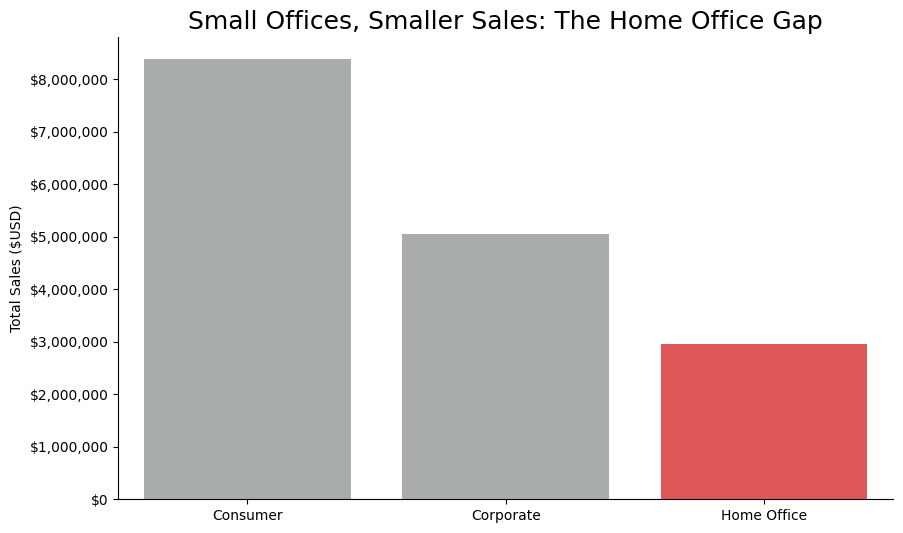

In [121]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}')) #.0f means zero decimals as a float

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


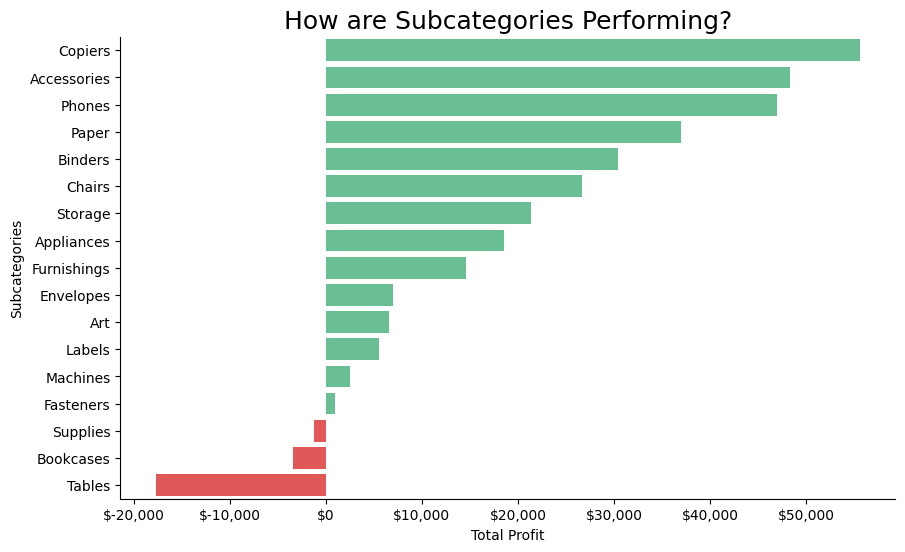

In [ ]:
plt.figure(figsize=(10,6))
colors = ["#5ccc94" if x > 0 else "#f74141" for x in result3["total_profit"]]
sns.barplot(result5, x='total_profit', y='subcategory', palette=colors, hue='subcategory', legend=False, orient='h')
plt.title('How are Subcategories Performing?',fontsize=18)
plt.xlabel('Total Profit')
plt.ylabel('Subcategories')

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

sns.despine()
plt.show()

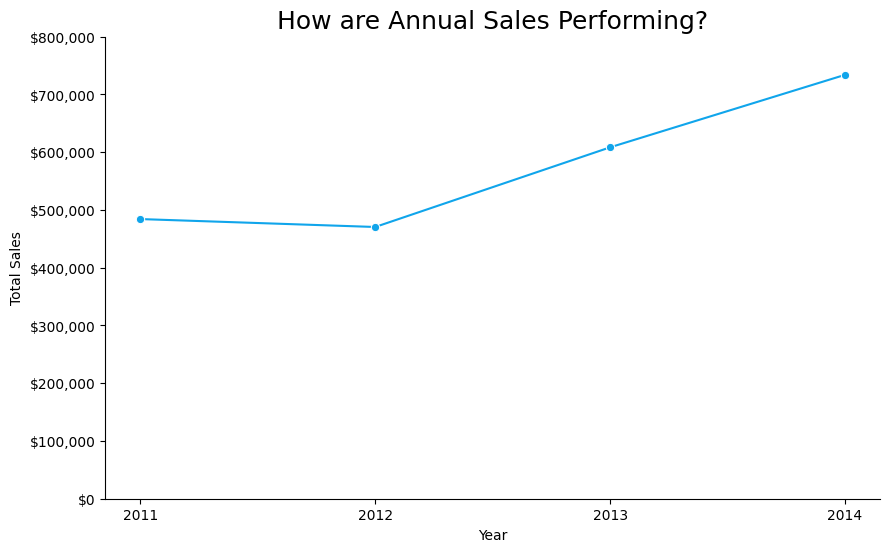

In [127]:
plt.figure(figsize=(10,6))

sns.lineplot(result7, x='order_year', y='total_sales', color = "#10A5EB", marker ='o', legend=False)
plt.title('How are Annual Sales Performing?', fontsize=18)
plt.ylim(0, 800000)
plt.xlabel('Year')
plt.ylabel('Total Sales')

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

sns.despine()
plt.show()

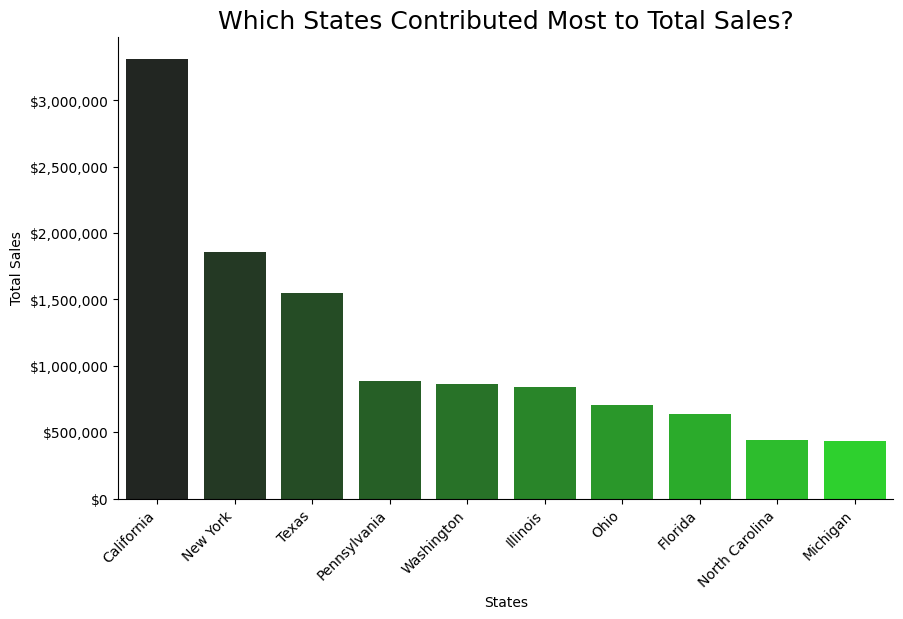

In [143]:
plt.figure(figsize=(10,6))

sns.barplot(result5, x='state', y='total_sales', palette='dark:#13EB13', hue = 'state', legend=False)
plt.title('Which States Contributed Most to Total Sales?',fontsize=18)
plt.xlabel('States')
plt.ylabel('Total Sales')

plt.xticks(rotation = 45, ha ='right')

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

sns.despine()
plt.show()

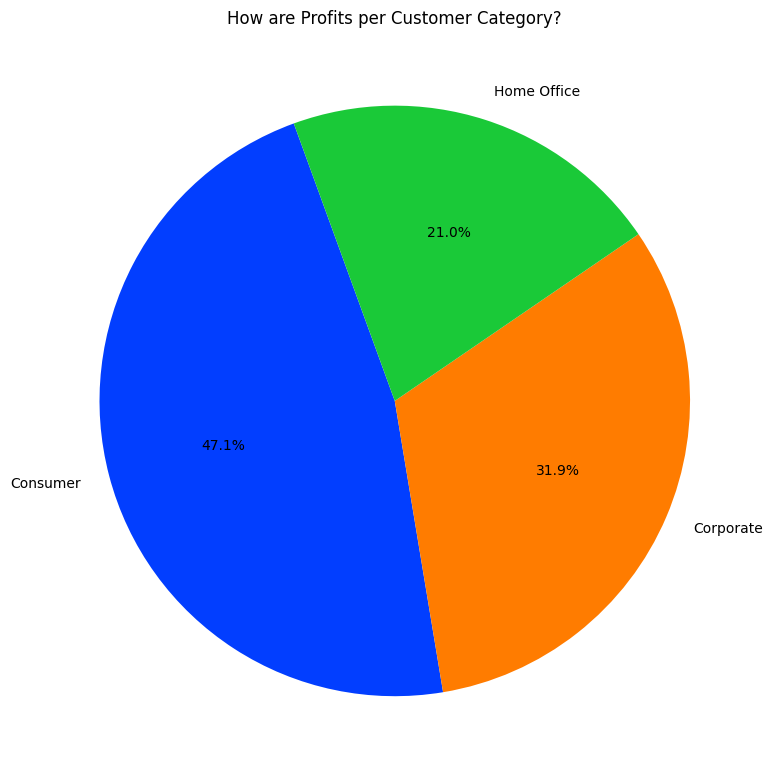

In [ ]:
# I know this uses the example query, but it seemed the most appropriate for a pie chart with 3 variables that weren't already percentages (like discount or profit %s)

plt.figure(figsize = (8, 8))

total_profit = result1.groupby('customer_category')['total_profit'].sum()

plt.pie(
    data = result1,
    x = total_profit,
    labels = ['Consumer', 'Corporate', 'Home Office'],
    startangle = 110,                   
    colors = sns.color_palette('bright')[0:3],
    autopct = "%1.1f%%"                 
    )

plt.title("How are Profits per Customer Category?")

plt.tight_layout()
plt.show()

## SQL Feedback 
1) There are numerous functions and quirks for MySQL and SQLite that I had to learn on my own for some of the exercises to make sense. Going over some of these in advance would have saved some trouble.  

    * You HAVE to use a GROUP BY if you are using an aggregate, but a GROUP BY without an aggregate is basically DISTINCT
    * Functions like YEAR() and DAY() exist in MySQL to break down datetime columns
        - These functions do not work in SQLite. You must use strftime() instead.
    * GROUP BY must include all columns that aren't part of an aggregate EXCEPT sometimes when the column is the primary key
        - See Q3 in SQL_joins for coffeeshop.db - you can GROUPBY by just order_id and not have to use c.first_name, c.last_name, s.name, o.order_datetime, or o.status.
        - Also in sqlite, if there are multiple non-aggregate columns in SELECT and you choose only one of them in the GROUP BY, sqlite will arbitrarily choose a random field and assign it in the GROUP BY.  
            - So while syntactically correct, the results will be incorrect. Learned that the hard way.
            - Need more testing to see when/if primary key truly works over a different number of SELECT parameters - what's the hard rule here?
2) WHERE is applied after the join, but before aggregation.
3) If you define a aggregate alias in SELECT (ex: SUM(quantity) AS total_amount), you can only use that alias AFTER the GROUP BY in the query order, since the aggregation has to happen first.
4) ROW_NUMBER() OVER PARTITION BY - this one is tough to understand fully. I wouldn't mind some more focus on it.
5) Same for CASE WHEN - examples and explanation would be helpful
6) Same for subqueries
7) Table aliases (ex: FROM products p), while not terribly difficult to understand, are not explicitly explained. It was confusing in the beginning when trying to search the internet for help overall.

## Course Feedback
1) I enjoyed the pace and teaching style of the Intro course (explanation-questions-code challenges). In the DA pathway, it became more weighted to videos and large exercises comparatively, which is ok, just stating my preferred learning method.
2) Having rock, paper, scissors and dungeon quest in the same week in module 1 was scary at first, doable but scary. I felt accomplished when done, but it was a scramble. Is frontloading modules the best way?
3) The beginning of module 2 with data wrangling, pandas, data visualization, and matplotlib was the first time I felt truly overwhelmed. There were so many concepts and videos that I don't think I grasped some core curriculum to this day. I kind of stumble around in my notes to manipulate data frames and make plots/charts.
4) Module 3 with SQL was the most I used ChatGPT. I don't like using ChatGPT, and when I do, I don't want answers. I want to understand concepts and the why. But I don't know how else I would have gotten through it. I'll repeat what I've brough up in class a couple of times - SQL basics was fun (the random join question was addressed), but then aggregation and joins relatively seemed to skip intermediate directly to advanced (in logic and syntax). I was however relieved when the murder mystery and workflows that came after didn't hit the same level of SQL-query difficulty.
5) If not obvious, the items above are outliers. The course was/is truly great, and I learned more than I could have imagined in the beginning. The capstone is still a daunting task on the horizon, but I now know I can do it. Thank you!